In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

Load the Boston House Pricing Dataset

In [2]:
boston_df = pd.read_csv("HousingData.csv")
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
boston_df.shape

(506, 14)

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
boston_df['CRIM'].fillna(boston_df['CRIM'].mean(),inplace=True)
boston_df['ZN'].fillna(boston_df['ZN'].mean(),inplace=True)
boston_df['INDUS'].fillna(boston_df['INDUS'].mean(),inplace=True)
boston_df['CHAS'].fillna(boston_df['CHAS'].mean(),inplace=True)
boston_df['AGE'].fillna(boston_df['AGE'].mean(),inplace=True)
boston_df['LSTAT'].fillna(boston_df['LSTAT'].mean(),inplace=True)
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
#Summarizing the Stats of Dataset
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#Exploratory Data Analysis
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


Text(0, 0.5, 'Price')

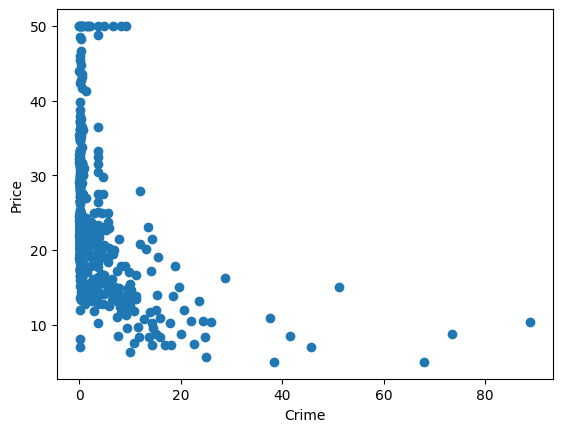

In [8]:
plt.scatter(boston_df['CRIM'],boston_df['MEDV'])
plt.xlabel('Crime')
plt.ylabel('Price')

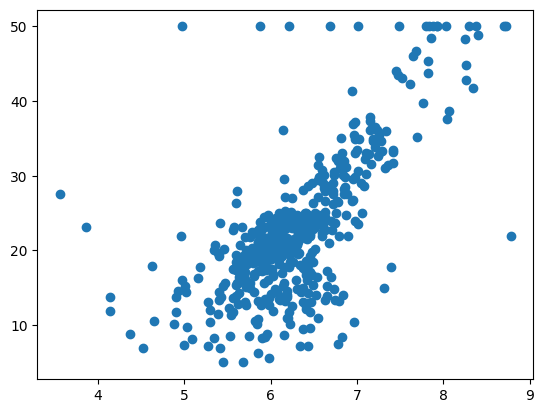

In [9]:
plt.scatter(boston_df['RM'],boston_df['MEDV'])

In [10]:
sns.regplot(x='RM',y='MEDV',data=boston_df)

NameError: name 'sns' is not defined

In [11]:
# Train Test Split
X = boston_df.iloc[:,:-1]
y=boston_df['MEDV']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

In [13]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.200000,4.0123,4,307,21.0,392.53,13.830000
440,22.05110,0.0,18.10,0.0,0.740,5.818,92.400000,1.8662,24,666,20.2,391.45,12.715432
103,0.21161,0.0,8.56,0.0,0.520,6.137,68.518519,2.7147,5,384,20.9,394.47,13.440000
178,0.06642,0.0,4.05,0.0,0.510,6.860,74.400000,2.9153,5,296,16.6,391.27,6.920000
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.700000,3.9769,4,307,21.0,396.90,18.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.04666,80.0,1.52,0.0,0.404,7.107,36.600000,7.3090,2,329,12.6,354.31,8.610000
180,0.06588,0.0,2.46,0.0,0.488,7.765,83.300000,2.7410,3,193,17.8,395.56,7.560000
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.700000,3.9175,3,223,18.6,394.96,7.730000
290,0.03502,80.0,4.95,0.0,0.411,6.861,27.900000,5.1167,4,245,19.2,396.90,3.330000


In [14]:
#Strandardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [85]:
X_test

array([[-0.31135783, -0.49786231, -0.40696478, ...,  1.173768  ,
         0.38037948,  0.20249681],
       [ 1.88700805, -0.49786231,  1.09637511, ...,  0.80759583,
         0.36850044,  0.04026655],
       [-0.37777112, -0.49786231, -0.34357093, ...,  1.12799648,
         0.40171776,  0.14573059],
       ...,
       [-0.38783117,  0.34935041, -0.58507132, ...,  0.07525148,
         0.40710733, -0.68538503],
       [-0.3960837 ,  2.89098858, -0.88845617, ...,  0.34988061,
         0.42844561, -1.32582438],
       [-0.38999022,  0.03164564, -0.44771797, ..., -1.48098024,
         0.35805128,  0.47613908]])

In [86]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [87]:
reg.fit(X_train,y_train)

LinearRegression()

In [88]:
reg.coef_

array([-1.12295447,  0.78675009, -0.58996066,  0.98595856, -1.71436093,
        3.22318298, -0.40860928, -3.05126423,  2.78238634, -2.28836693,
       -1.99892002,  0.5173385 , -2.97949583])

In [89]:
reg.intercept_

22.73700564971751

In [90]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [91]:
# Prediction with test data
prediction = reg.predict(X_test)

In [92]:
prediction

array([17.62066849, 16.40047246, 20.42549251, 31.76417476, 16.28057393,
       17.89454457, 19.93550089, 42.35331197, 15.05674706, 24.5365307 ,
       20.49684404, 32.992958  , 22.35225822, 30.04851399, 13.20843401,
       24.6266621 , 14.67840923, 28.29639851, 15.46305957, 27.51626518,
       21.14820933, 17.86054591, 31.38363124, 13.36413695, 15.65510387,
       16.35005398, 18.39068065,  0.4678964 , 13.75085198, 13.50226502,
       16.99522657, 22.99634533, 33.04630876, 28.75719285, 19.40637733,
       22.84715022, 10.90223263, 22.23927641, 20.72651174, 18.45227276,
       16.70147599, 18.96014362, 41.20248496, 25.04875972, 26.54710058,
       21.30463044, 23.23544889, 17.84120427, 18.37358537, 15.52902163,
       15.7545294 , 17.79668916, 19.19498471, 24.3848216 , 30.52564073,
       23.43931229, 35.97312495, 24.48585595, 14.26859384, 36.08064302,
       22.6005811 , 20.16681062, 30.44491319, 20.55254987, 17.99251145,
       11.62814041, 17.24694431, 24.07671743, 36.29859644, 32.57

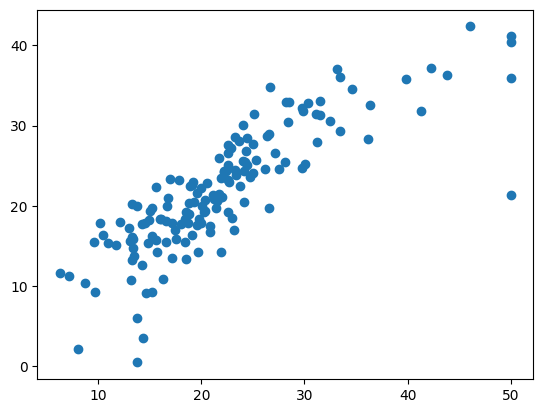

In [93]:
plt.scatter(y_test,prediction)

In [96]:
residuals=y_test-prediction
residuals

21     1.979332
440   -5.900472
103   -1.125493
178   -1.864175
22    -1.080574
         ...   
197   -2.509421
180    4.017809
272   -3.990644
290   -4.403744
12     0.288677
Name: MEDV, Length: 152, dtype: float64

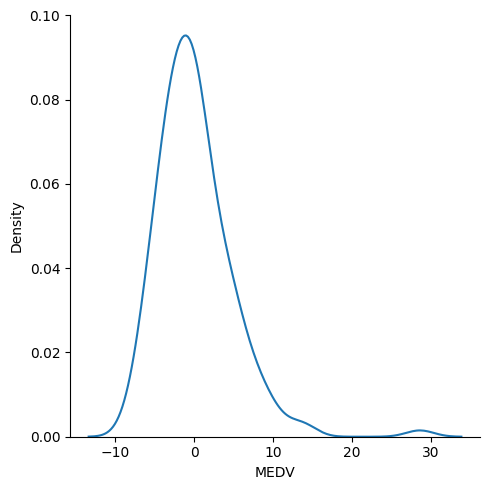

In [98]:
# plot the residuals
sns.displot(residuals,kind='kde')

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,prediction))
print(mean_squared_error(y_test,prediction))
print(np.sqrt(mean_squared_error(y_test,prediction)))



3.4267326040969706
22.78809461471466
4.773687737453578


In [101]:
# R2 Score 
from sklearn.metrics import r2_score
score = r2_score(y_test,prediction)
score

0.693247605492548

In [102]:
# Adjusted R2 Score
1-(1-score)*(len(y_test-1)/len(y_test-X_test.shape[1]-1))

0.693247605492548

In [18]:
# prediction on new data
ls = boston_df.iloc[0,:-1].to_list()
arr = np.array(ls)
arr = arr.reshape(1,-1)

In [19]:
arr.shape

(1, 13)

In [20]:
# transform data
arr_new = scaler.transform(arr)

c:\Users\Cars24\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [122]:
reg.predict(arr_new)

array([30.04851399])

Pickeling the model for deployement

In [123]:
import pickle

In [124]:
pickle.dump(reg,open('regmodel.pkl','wb'))

In [125]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [126]:
pickled_model.predict(arr_new)

array([30.04851399])

array([[-0.39905992,  0.26462914, -1.28693181, -0.27094022, -0.13107853,
         0.37217696, -0.09888472,  0.12829664, -0.97322533, -0.64346542,
        -1.43520872,  0.42844561, -1.08565962]])